<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [1]:
%matplotlib inline
import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import statistics
from IPython.display import display, Markdown, Latex
import time

In [2]:
G = nx.read_edgelist("dbpedia-similar/out.dbpedia-similar",create_using=nx.Graph())

# remove self loops 
G_edges = [edge for edge in G.edges]
for (a,b) in G_edges:
    if a == b:
        G.remove_edge(a,b)

G_new = nx.Graph()
G_new.add_nodes_from([int(node)-1 for node in G.nodes])
G_new.add_edges_from([(int(a)-1, int(b)-1) for (a,b) in G.edges])
G = G_new.copy()

 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [3]:
def mean_degree(G):
    degs = G.degree
    degrees = [b for (a,b) in degs]
    return statistics.mean(degrees)
    

In [4]:
initial_node_count = len(G.nodes)       #uncomment and complete
initial_edges_count = len(G.edges)
initial_connected_components = nx.connected_components(G) #uncomment and complete
initial_connected_components_count = len([item for item in initial_connected_components])

In [5]:
print(f"initial number of nodes: {initial_node_count}")
print(f"initial number of edges: {initial_edges_count}")
print(f"initial number of connected components :{initial_connected_components_count}")
print(f"mean degree: {mean_degree(G)}")

initial number of nodes: 430
initial number of edges: 564
initial number of connected components :95
mean degree: 2.6232558139534885


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [6]:
initial_adj_matrix = nx.adjacency_matrix(G, [i for i in range(initial_node_count)]).toarray()
initial_unconnected_count = 0
initial_unconnected_pairs = set()
for i in range(initial_node_count):
    for j in range(i+1,initial_node_count):
        if initial_adj_matrix[i][j]!=1:
            if (i,j) in G.edges or (j,i) in G.edges:
                print(i,j)
            initial_unconnected_count+=1
            initial_unconnected_pairs.add((i,j))
print(f"initial number of unconnected pairs: {initial_unconnected_count}")

<ipython-input-6-393271eef45a>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  initial_adj_matrix = nx.adjacency_matrix(G, [i for i in range(initial_node_count)]).toarray()


initial number of unconnected pairs: 91671


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [7]:
# removable edges: check splitting and number of nodes
#if ( == initial_connected_components) and ( == initial_node_count): #uncomment and complete (modifications allowed)

# make a copy of the graph 
G_coppied = G.copy()

removable_edges_count, removable_edges = 0, set()
G_coppied_edges = G_coppied.edges
for (a,b) in G_coppied_edges:
    G_coppied.remove_edge(a,b)
    con_comp = [item for item in nx.connected_components(G_coppied)]
    if (len(con_comp) == initial_connected_components_count) and \
    (len(G_coppied.nodes) == initial_node_count):
        # if connectivity isn't breached add one to removable edges and continue
        removable_edges_count += 1
        removable_edges.add((a,b))
    else:          
        # else if connectivity is breached reinsert the edge
        G_coppied.add_edge(a,b)
        
print(f"removable edges: {removable_edges_count}")

# put all edges in lexicographical order:

def orderLexic(edge):
    (a,b) = edge
    if b < a:
        return (b,a)
    return (a,b)

removable_edges = [item for item in map(orderLexic, removable_edges)]   

removable edges: 229


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [8]:
import pandas as pd

d = dict()

#dataframe of removable edges (they will function as positive samples)
#...['link'] = 1  #uncomment and complete

#dataframe of unconnected node pairs (they will function as negative samples)
#...['link'] = 0 # uncomment and complete

#merge in one dataframe

d['edges'] = [edge for edge in initial_unconnected_pairs] + [edge for edge in removable_edges]
d['link'] = [0 for i in range(len(initial_unconnected_pairs))] + [1 for i in range(len(removable_edges))]
df_removable_and_unconnected = pd.DataFrame(data = d)

#build graph G'=G_reduced
G_reduced = G.copy()
for (a,b) in removable_edges:
    G_reduced.remove_edge(a,b)
    
print(f"number of nodes in G': {len(G_reduced.nodes)}")
print(f"number of edges in G': {len([edge for edge in G_reduced.edges])}")
print(f"mean degree {mean_degree(G_reduced)}")
print(f"number of connected components in G': {len([item for item in nx.connected_components(G_reduced)])}")

number of nodes in G': 430
number of edges in G': 335
mean degree 1.558139534883721
number of connected components in G': 95


In [9]:
df_removable_and_unconnected = df_removable_and_unconnected.set_index('edges')

<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li> 
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [10]:
#def JCfunction(threshold_jc):   #uncomment and complete
#return recall_jc, precision_jc, accuracy_jc; #uncomment and complete

# k = Α.Μ. mod 10 

In [11]:
# calculate jaccard coefficients
jc = nx.jaccard_coefficient(G_reduced)
jc = [item for item in jc]

In [12]:
# get k edges with largest jc
k = 3118017 % 10

jc = sorted(jc, key = (lambda item : item[2]), reverse = True)

print(f"first {k} edges with largest jaccard coefficient: ")
for i in range(k):
    item = jc[i]
    print(f"edge: {item[:2]}, jaccard coefficient: {item[2]} ")
    

first 7 edges with largest jaccard coefficient: 
edge: (3, 45), jaccard coefficient: 1.0 
edge: (3, 46), jaccard coefficient: 1.0 
edge: (3, 48), jaccard coefficient: 1.0 
edge: (22, 33), jaccard coefficient: 1.0 
edge: (26, 32), jaccard coefficient: 1.0 
edge: (45, 46), jaccard coefficient: 1.0 
edge: (45, 48), jaccard coefficient: 1.0 


In [13]:
def isLink(edge):
    if df_removable_and_unconnected['link'][edge]==1:
        return True
    return False

def JCfunction(thres):
    # count tp tn fp fn
    tp, tn, fp, fn = 0, 0, 0, 0
    not_in_df = 0
    
    for item in jc:
        edge, inv_edge, score = (int(item[0]), int(item[1])), (int(item[1]), int(item[0])), item[2]
       
        if edge in df_removable_and_unconnected.index:
            if score >= thres:
                if isLink(edge):
                    tp += 1
                else:
                    fp += 1
            else:
                if not isLink(edge):
                    tn += 1
                else:
                    fn += 1
        elif inv_edge in df_removable_and_unconnected.index:
            if score >= thres:
                if isLink(inv_edge):
                    tp += 1
                else:
                    fp += 1
            else:
                if not isLink(inv_edge):
                    tn += 1
                else:
                    fn += 1
        else:
            not_in_df += 1
    
    pr = tp / (tp+fp) if (tp+fp) > 0 else 0
    rec = tp / (tp+fn) if (tp+fn) > 0 else 0
    acc = (tp+tn) / (tp+fp+tn+fn) 
    return pr, rec, acc
    

In [14]:
precisions_jc, recalls_jc, accuracies_jc = dict(), dict(), dict()
thresholds = [0.1, 0.15, 0.25, 0.5, 1.0]
for t in thresholds:
    precisions_jc[t], recalls_jc[t], accuracies_jc[t] = JCfunction(t)

In [15]:
def plotBarChart(x, ylist, cols, labs, tit, xlab, ylab, figsize=(15,8), subplots=1, x2=None, ylist2=None):
    plt.clf()
    
    if subplots == 1:
        fig, ax = plt.subplots(figsize=figsize)
        # offsets of bar plots
        xaxis = np.arange(len(x))
        totalWidth = len(ylist)*0.2-0.2
        offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist))]

        for i in range(len(ylist)):
            fig = plt.bar(xaxis+offset[i], ylist[i], color=cols[i], label=labs[i], width=0.2)

        # correct the xticklabels
        ax.set_xticks(xaxis)
        ax.set_xticklabels(x)

        plt.legend()
        plt.xlabel(xlab, fontsize=15)
        plt.ylabel(ylab, fontsize=15)
        plt.title(tit, fontsize=20)
        plt.grid(axis='y')
        
    else:
        fig, [ax,ax2] = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        fig.suptitle(tit, fontsize=20)
        
        plt.subplot(1,2,1)
        # barplot 1
        xaxis = np.arange(len(x))
        # offsets of bar plots
        totalWidth = len(ylist)*0.2-0.2
        offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist))]

        for i in range(len(ylist)):
            fig = ax.bar(xaxis+offset[i], ylist[i], color=cols[i], label=labs[i], width=0.2)

        # correct the xticklabels
        ax.set_xticks(xaxis)
        ax.set_xticklabels(x)
        ax.legend()
        plt.xlabel(xlab, fontsize=15)
        plt.ylabel(ylab, fontsize=15)
        plt.grid(axis='y')
        
        
        # barplot 2
        plt.subplot(1,2,2)
        xaxis2 = np.arange(len(x2))
        # offsets of bar plots
        totalWidth = len(ylist2)*0.2-0.2
        offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist2))]

        for i in range(len(ylist2)):
            fig = ax2.bar(xaxis2+offset[i], ylist2[i], color=cols[i], label=labs[i], width=0.2)

        # correct the xticklabels
        ax2.set_xticks(xaxis2)
        ax2.set_xticklabels(x2)
        ax2.legend()
        plt.xlabel(xlab, fontsize=15)
        plt.ylabel(ylab, fontsize=15)    
        plt.grid(axis='y')

<Figure size 432x288 with 0 Axes>

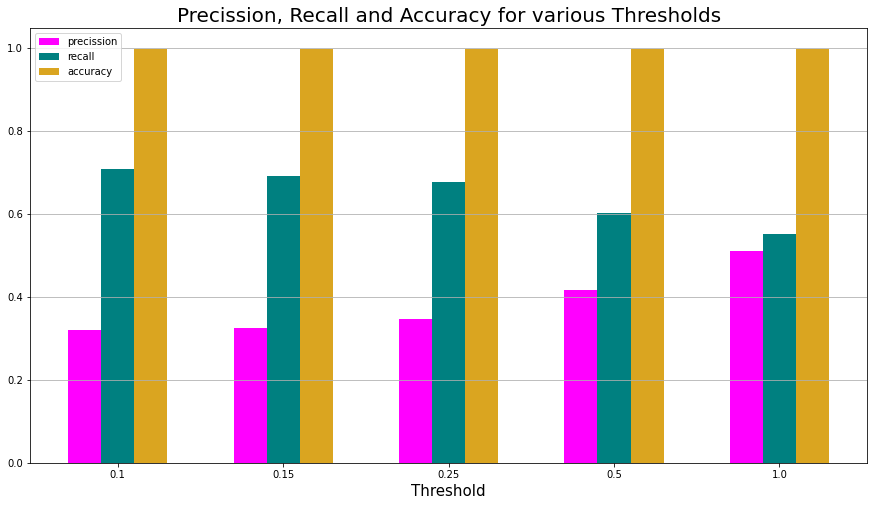

In [16]:
ys = []
ys.append(list(precisions_jc.values()))
ys.append(list(recalls_jc.values()))
ys.append(list(accuracies_jc.values()))
# print(ys)
plotBarChart([str(item) for item in thresholds], 
             ys, 
             ['magenta', 'teal', 'goldenrod'], 
             ['precission', 'recall', 'accuracy'], 
             "Precission, Recall and Accuracy for various Thresholds", 
             "Threshold",
             "",
             figsize=(15,8))

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

Για τον υπολογισμό του correlation μπορούμε να χρησιμοποιήσουμε την μέθοδο corr() του pandas. Είναι άλλωστε πολύ βολική σε σχέση με την αναπαράσταση που χρησιμοποιούμε.

In [17]:
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
df_coppied = df_removable_and_unconnected.copy(deep=True)
df_coppied

,link
edges,
"(132, 268)",0
"(192, 319)",0
"(35, 335)",0
"(54, 385)",0
"(95, 386)",0
...,...
"(335, 337)",1
"(334, 339)",1
"(4, 46)",1


In [18]:
def triple2dict(myList):
    myDict = dict()
    for (a,b,c) in myList:
        if a < b:
            myDict[(a,b)]=c
        else:
            myDict[(b,a)]=c
    return myDict
            

In [19]:
#dataframe for similarity-based measurement values

#Jaccard Coefficient
# calculate jc and turn list into dict
jc = list(nx.jaccard_coefficient(G_reduced))
jc_dict = triple2dict(jc)

# create list to turn into dataframe column
jc_col = [jc_dict[edge] for edge in list(df_coppied.index)]

In [20]:
# Preferential Attachment

# calculate pa and turn list into dict
pa = nx.preferential_attachment(G_reduced)
pa_dict = triple2dict(pa)

# create list to turn into dataframe column
pa_col = [pa_dict[edge] for edge in list(df_coppied.index)]

In [21]:
# Resource Allocation

# calculate ra and turn into dict
ra = nx.resource_allocation_index(G_reduced)
ra_dict = triple2dict(ra)

# create list to turn into dataframe column
ra_col = [ra_dict[edge] for edge in list(df_coppied.index)]

In [22]:
df_coppied['JaccardCoefficient'] = jc_col
df_coppied['PreferentialAttachment'] = pa_col
df_coppied['ResourceAllocation'] = ra_col

In [23]:
df_coppied[['link']]

,link
edges,
"(132, 268)",0
"(192, 319)",0
"(35, 335)",0
"(54, 385)",0
"(95, 386)",0
...,...
"(335, 337)",1
"(334, 339)",1
"(4, 46)",1


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [24]:
#uncomment whole cell
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#features, uncomment and complete
X = df_coppied[['JaccardCoefficient', 'PreferentialAttachment', 'ResourceAllocation']] 
#target, uncomment and complete
y = df_coppied['link']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0) #uncomment and complete

In [25]:
#uncomment whole cell
classifier = RandomForestClassifier()   

from sklearn.preprocessing import MinMaxScaler 
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [26]:
model.fit(X_train_scaled, y_train)#train the model, uncomment and complete

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [27]:
predictions = model.predict(X_test_scaled)       #uncomment
print("7 first predictions:")
predictions[:7] #get (A.M. last digit) first predictions, uncomment and complete

7 first predictions:


array([0, 0, 0, 0, 0, 0, 0])

In [28]:
predict_proba = model.predict_proba(X_test_scaled) #uncomment and complete

In [29]:
print(f"dataframe row for (1,47) pair:")
df_coppied.loc[[(0, 46)],['link','JaccardCoefficient', 'PreferentialAttachment', 'ResourceAllocation']]

dataframe row for (1,47) pair:


,link,JaccardCoefficient,PreferentialAttachment,ResourceAllocation
edges,,,,
"(0, 46)",0,0.0,1,0.0


In [30]:
# predict probability that 1,47 will get connected
print("probability that (1,47) pair will be connected:")
test_1_47 = df_coppied.loc[[(0, 46)],['JaccardCoefficient', 'PreferentialAttachment', 'ResourceAllocation']]
print(model.predict_proba(mm_scaler.transform(test_1_47))[0][1])

probability that (1,47) pair will be connected:
0.0002776026870761236


In [31]:
print("Accuracy Score: ")
model.score(X_test_scaled,y_test)

Accuracy Score: 


0.9989989118607182

<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [32]:
#install node2vec with conda / pip
from node2vec import Node2Vec   #uncomment
import multiprocessing          #uncomment

#generate walks
node2vec_walker = Node2Vec(G_reduced, 
                           p=1, 
                           q=1, 
                           dimensions=128, 
                           num_walks=10, 
                           walk_length=80, 
                           workers= multiprocessing.cpu_count()) #uncomment and complete

#train node2vec model
n2v_model = node2vec_walker.fit(window=10 , min_count=1) #uncomment and complete

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [33]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
# x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for (i,j) in df_removable_and_unconnected.index]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)  #uncomment and complete

In [ ]:
#uncomment whole cell
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train, y_train)   #uncomment and complete

In [ ]:
# find accuracy
print("Accuracy: ")
classifier.score(X_test, y_test)

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>